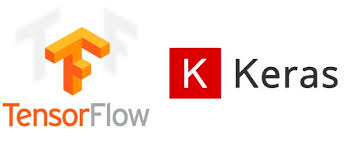

<div style="direction:rtl">
    
# مقدمات  Back Propagation
برای بهینه سازی و کاهش میزان خطا در برخی از مسال نظیر طبقه بندی و رگرسیون با استفاده از شبکه های عصبی از الگوریتمی به نام Back Propagation برای انتشار خطا به عقب استفاده می کنند تا بدین وسیله  با تغییر پارامتر ها بتوانند میزان خطا را کاهش دهند. یکی از بهترین منابع برای فهم عملکرد Back Propagation سایت (https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)  می باشد  
</div>

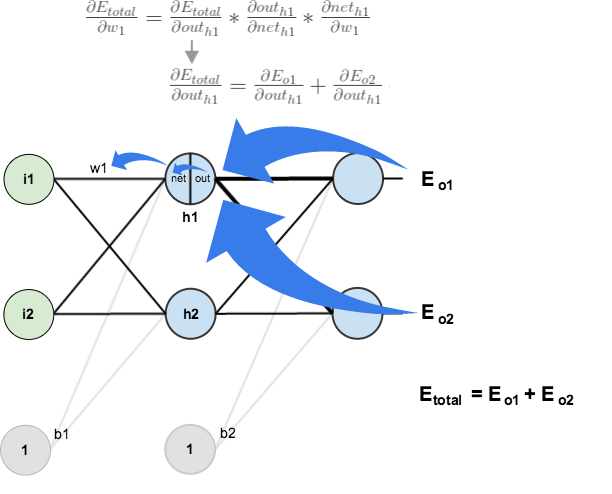



<div style="direction:rtl">
    
# پیاده سازی Back Propagation 

برای نمایش نحوه عملکرد ما دو مثال یکی برای رگرسیون و یکی برای طبقه بندی را مورد بررسی قرار می دهیم  
</div>


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

## A Regression Example

------------------------------
<div style="direction:rtl">
    
برخلاف تصور عموم رگرسیون یک الگوریتم نمی باشد بلکه یک روش یادگیری است که در آن هدف پیش بینی در یک فضای پیوسته می باشد این روش می تواند توسط انواع متفاوت الگوریتم هایی یادگیری پیاده سازی شود. در زیر ما یک مثال ساده از این مساله را حل می کنیم در بخش های بعدی به کامل شده ی این الگوریتم می پردازیم و مثال های واقعی روی داده های واقعی را حل می کنیم. 
 
</div>

  `target_values=x_data * A `



In [3]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)

<div style="direction:rtl">
حال ما متغییری که قرار است یادگیری شود را معرفی کنیم. مقدار این متغییر در زمان Back Propagation شدن خطا یادگیری می شود 
</div>

`A`

In [4]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(shape=[1]))

<div style="direction:rtl">
عملگر های اصلی گراف محاسباتی را تعریف می کنیم
</div>


In [5]:
# Add operation to graph
my_output = tf.multiply(x_data, A)

<div style="direction:rtl">
در ادامه یکی از توابع هزینه ای که قبلا برای مسأل رگرسون بررسی کردیم از جمله L2 و  L1 را برای این مساله مورد استفاده قرار می دهیم 
</div>


`tf.square()`  `tf.abs()`.

In [6]:
# Add L2 loss operation to graph
loss = tf.square(my_output - y_target)

<div style="direction:rtl">
مقدار متغییر های موجود در گراف محاسباتی را مقدار دهی اولیه می کنیم 
</div>


In [8]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

<div style="direction:rtl">
 ما نیاز دایم که یک بهینه ساز تعریف کنیم برای این منظور ما از GradientDescentOptimizer() که یک روش استاندارد برای این منظور می باشد استفاده می کنیم. این تابع دارای یک پارامتر نرخ یادگیری می باشد که ما مقدار آن را برابر 0.02 در نظر می گیریم
</div>

`GradientDescentOptimizer()`

learning rate =`0.02`

In [9]:
# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

<div style="direction:rtl">
    
### Running the Regression Graph!

در انتها ما گراف محاسباتی رگرسیون را به ازای 100 بار تکرار اجرا می کنیم. مقادیر A در هر 25 بار اجرا به همراه میزان خطا نمایش داده می شود. مدل زمانی درست جواب می دهد که مقدارA هر بار نزدیک و نزدیک به 10 شود و مقدار خطا نیز کاهش یابد 
</div>


In [14]:
# Run Loop
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})))

Step #25 A = [9.780083]
Loss = [0.69163024]
Step #50 A = [9.830041]
Loss = [2.215793]
Step #75 A = [9.908479]
Loss = [0.09288504]
Step #100 A = [9.876606]
Loss = [0.17147382]


## Classification Example

--------------------

<div style="direction:rtl">
برای طبقه بندی ما مجموعه ای از داده ها را به همراه همجموعه ای از برجسب ها که 0 و 1 می باشند تعریف می کنیم. برای این منظور از تابع تولید داده های تصادفی استفاده می کنیم.

`Normal(mean = -1, sd = 1)` and `Normal(mean = 3, sd = 1)`    
مدل باید به صورت طبقه بند دودویی باشد که اگر مقدار `sigmoid(x+A) < 0.5`  باشد کلاس 0 را پیش بینی کد و در غیر این صورت کلاس 1 را پیش بینی کند 
</div>



In [16]:
ops.reset_default_graph()
# Create graph
sess = tf.Session()


<div style="direction:rtl">
    
ما داده هایی که قرار است آن ها را به گراف محاسباتی بفرستیم را تعریف می کنیم. `x_vals` اشاره به این داده دارد که ما ترکیب دو مقدار تصادفی را برای آن در نظر می گیریم. همچنین برای تولید برجسب داده ها نیز به این ترتیب عمل می کنیم 
</div>


In [27]:
# Create data
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(3, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)

<div style="direction:rtl">
حال مقدار متغییر قابل یادگیری را تعریف می کنیم 
</div>


In [28]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

<div style="direction:rtl">
مقدار داده ها را با A جمع می کنیم سپس این مقادیر را بسط می دهیم تا بتوانیم برروی آن ها تابع هزینه را اعمال کنیم 
</div>

`# 't' is a tensor of shape [2]
tf.shape(tf.expand_dims(t, 0))  # [1, 2]
tf.shape(tf.expand_dims(t, 1))  # [2, 1]
tf.shape(tf.expand_dims(t, -1))  # [2, 1]
` 

` # 't2' is a tensor of shape [2, 3, 5]
tf.shape(tf.expand_dims(t2, 0))  # [1, 2, 3, 5]
tf.shape(tf.expand_dims(t2, 2))  # [2, 3, 1, 5]
tf.shape(tf.expand_dims(t2, 3))  # [2, 3, 5, 1]
` 



In [35]:
# Add operation to graph
# Want to create the operstion sigmoid(x + A)
# Note, the sigmoid() part is in the loss function
my_output = tf.add(x_data, A)

# Now we have to add another dimension to each (batch size of 1)
my_output_expanded = tf.expand_dims(my_output, 0)
y_target_expanded = tf.expand_dims(y_target, 0)

<div style="direction:rtl">
تابع هزینه ی cross entropy را بر روی آن اعمال می کنیم. 
</div>


In [36]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output_expanded, labels=y_target_expanded)

<div style="direction:rtl">
حال مقدار نرخ یادگیری را تنظیم می کنیم
</div>

`0.05`

In [38]:
# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

### Running the Classification Graph!


In [39]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)
# Run loop
for i in range(1400):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%200==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y})))

Step #200 A = [4.686855]
Loss = [[2.5555866]]
Step #400 A = [0.86173517]
Loss = [[0.01082143]]
Step #600 A = [-0.5113839]
Loss = [[0.34457758]]
Step #800 A = [-1.0290096]
Loss = [[0.05472298]]
Step #1000 A = [-1.0467402]
Loss = [[0.05342031]]
Step #1200 A = [-1.1102843]
Loss = [[0.19038704]]
Step #1400 A = [-1.1249235]
Loss = [[0.15658395]]


# Accuracy

$Accuracy= \frac{TP+TN}{TP+TN+FP+FN}$

In [41]:
# Evaluate Predictions
predictions = []
for i in range(len(x_vals)):
    x_val = [x_vals[i]]
    prediction = sess.run(tf.round(tf.sigmoid(my_output)), feed_dict={x_data: x_val})
    predictions.append(prediction[0])
    
accuracy = sum(x==y for x,y in zip(predictions, y_vals))/100.
print('Ending Accuracy = ' + str(np.round(accuracy, 2)))

Ending Accuracy = 0.96


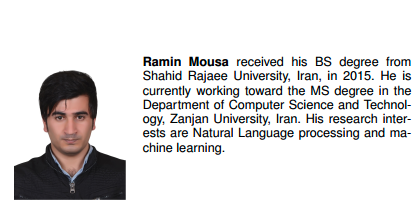